# Assessment

## Michael NANA KAMENI

### Question 1

Using the taiChiData.csv dataset, study the effect of treatment after 24 weeks. 


#### Question 1.1
Plot a box-and-whisker plot to see the mean difference between 24 weeks and the baseline. Formulate a hypothesis about treatment after 24 weeks. Interpret the results obtained.


In [1]:
# Let us import useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Just to ignore warnings messages
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

In [3]:
# Let us load data in df
df = pd.read_csv('taiChiData.csv', sep = ',')
df

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0
5,6,21,1,39.2,5.5,41.32,tai chi,NaN,78.0,66.0,70.0
6,7,2,1,36.5,17.4,49.42,control,diabetes,NaN,58.0,57.0
7,8,19,1,28.1,11.7,51.72,control,none,60.0,54.0,54.0
8,9,32,1,38.8,14.5,36.95,tai chi,none,61.0,48.0,49.0
9,10,5,1,31.3,11.4,62.51,control,diabetes,63.0,59.0,61.0


In [4]:
# Let us clean our data by filling the null numerical value with the mean
#df['FIQ_baseline'].fillna(df['FIQ_baseline'].mean(), inplace = True)
#df['FIQ_12W'].fillna(df['FIQ_12W'].mean(),inplace = True)
#df['FIQ_24W'].fillna(df['FIQ_24W'].mean(), inplace = True)

In [5]:
# Let's have a look of the type of column variables
df.dtypes

Unnamed: 0        int64
Id                int64
sex               int64
BMI             float64
duration        float64
age             float64
treatment        object
coexists         object
FIQ_baseline    float64
FIQ_12W         float64
FIQ_24W         float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
Unnamed: 0      50 non-null int64
Id              50 non-null int64
sex             50 non-null int64
BMI             50 non-null float64
duration        50 non-null float64
age             50 non-null float64
treatment       50 non-null object
coexists        47 non-null object
FIQ_baseline    46 non-null float64
FIQ_12W         47 non-null float64
FIQ_24W         49 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 4.4+ KB


In [7]:
# Let's have a look of the number of null values each column has
df.isnull().sum()

Unnamed: 0      0
Id              0
sex             0
BMI             0
duration        0
age             0
treatment       0
coexists        3
FIQ_baseline    4
FIQ_12W         3
FIQ_24W         1
dtype: int64

In [8]:
# Let's deal with data cleaning.
# Let's drop the non-numerical null and duplicaticated columns 
df.dropna(inplace=True)           # Drop the null values
df.drop_duplicates(inplace=True)  # Drop duplicated values
df.drop(columns =['Unnamed: 0', 'sex'], inplace=True) 
df.shape

(39, 9)

In [9]:
# Let's find summary statistics
sum_stats = df.describe()
sum_stats

,Id,BMI,duration,age,FIQ_baseline,FIQ_12W,FIQ_24W
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,25.615385,33.871795,12.841026,49.797692,66.128205,59.256410,59.487179
std,14.805076,6.299204,4.284778,7.630660,11.927808,12.552454,12.744187
min,1.000000,20.300000,-1.800000,34.660000,42.000000,32.000000,38.000000
25%,13.000000,30.200000,10.850000,44.295000,58.500000,51.000000,49.500000
50%,25.000000,34.000000,13.300000,49.990000,66.000000,59.000000,58.000000
75%,38.000000,38.150000,16.300000,56.020000,78.000000,68.500000,69.500000
max,50.000000,45.900000,19.800000,62.730000,85.000000,88.000000,85.000000


Let us have a look of the distribution of different attributs or variables for us to check presence of outliers in the data set.

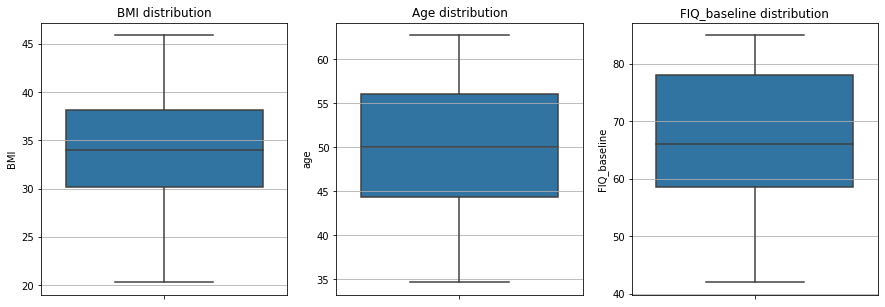

In [10]:
fig, ax = plt.subplots(ncols =3, figsize=(15,5))
(ax1, ax2, ax3) = ax

# Let draw our box-and-whisker plots
sns.boxplot(data= df, x='BMI', orient='v',ax=ax1)
sns.boxplot(data= df, x='age', orient='v', ax =ax2)
sns.boxplot(data= df, x='FIQ_baseline', orient='v', ax =ax3)

# Let's set title  to our plot
ax1.set_title("BMI distribution")
ax2.set_title("Age distribution")
ax3.set_title("FIQ_baseline distribution")

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)

## Interpretation

Everyone in the population sample has at least <b>20.3 as BMI(Body mass Index)</b> and at most <b>45.9</b>.  And <b>25 percent</b> of the total population sample has at most <b>30.2 as Body Mass Index, 50 percent</b> of the total population sample has at most or at least <b>34.0</b> as <b>Body mass Index</b>, and finaly, <b>25 percent</b> of the total population sample has at least <b>38.15 as body mass index(BMI)</b>.

The <b>youngest individual</b> in the sample population is <b>34.66 years old</b> and the <b>oldest</b> is <b>62.7 years old</b>. <b>Twenty-five (25) percent</b> of people ages in the total population sample is between <b>34.66</b> and <b>44.3 years old</b>, <b>Fifty percent</b> of people are under and/or over the age of <b>50 years old</b>, and <b>25 percent of people</b> are over the age of <b>56 years old.</b>

At the baseline, over the <b>39 people</b> to be submitted to treatment, but patient which has the least pain severity measures <b>32.00</b>, and the one who has the most pain severity measures <b>88.00</b>. <b>Twenty-five (25) percent</b> of patients of the whole population sample are pain severity measure between <b>32.00</b> and <b>51.0</b>, <b>Fifty percent</b> of patient pain severity measure is under and/or over <b>66.0</b>, and <b>25 patient pain severity</b> are over the measure of <b>78.0.</b>  

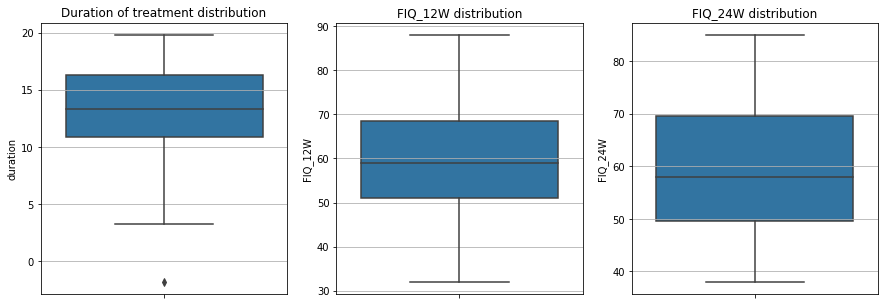

In [11]:
fig, ax = plt.subplots(ncols =3, figsize=(15,5))
(ax1, ax2, ax3) = ax

# Let draw our box-and-whisker plots
sns.boxplot(data= df, x='duration', orient='v',ax=ax1)
sns.boxplot(data= df, x='FIQ_12W', orient='v', ax =ax2)
sns.boxplot(data= df, x='FIQ_24W', orient='v', ax =ax3)

# Let's set title  to our plot
ax1.set_title("Duration of treatment distribution")
ax2.set_title("FIQ_12W distribution")
ax3.set_title("FIQ_24W distribution")

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)

Distribution of treatment duration present an <b>outlier</b> at point less than 0. While <b>FIQ_12W</b> and <b>FIQ_24W</b> seems to follows normal distribution.

In [12]:
# Let's deal with that outlier.

# Compute a function remove outlier to remove outlier in a column
def remove_outlier(df_in, column_name):
    first_quartile = df_in[column_name].quantile(0.25)
    third_quartile = df_in[column_name].quantile(0.75)
    iqr = third_quartile - first_quartile # Interquartile range
    fence_low = first_quartile - 1.5*iqr
    fence_high = third_quartile + 1.5*iqr
    data_out = df_in.loc[(df_in[column_name] > fence_low) & (df_in[column_name] < fence_high)]
    return data_out

# Call the function remove_outlier to remove outlier in the column duration

df_filtered = remove_outlier(df, 'duration')

Text(0.5, 1.0, 'Duration of treatment distribution')

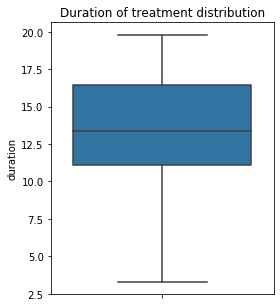

In [13]:
# Let's check if we have removed outlier.
plt.figure(figsize=(4,5))
sns.boxplot(data= df_filtered, x='duration', orient='v')
plt.title("Duration of treatment distribution")

We note that the outlier which was below the whisker plot has been removed. Now we feel safe at using our data set.

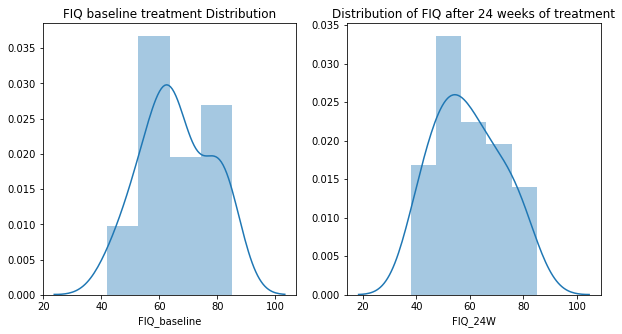

In [14]:
# Let's first visualise the distribution of both baseline and after 24 weeks of treatment for the whole dataset. 
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
(ax1, ax2)=ax
sns.distplot(df_filtered['FIQ_baseline'], ax=ax1).set_title('FIQ baseline treatment Distribution');
sns.distplot(df_filtered ['FIQ_24W'], ax=ax2).set_title('Distribution of FIQ after 24 weeks of treatment');

## Interpretation
We can easily see that both FIQ baseline treatment and FIQ after 24 weeks of treatment follow a histogram is queer to the left and a normal distrbution.

Text(0.5, 1, 'Visualisation Correlation between variables')

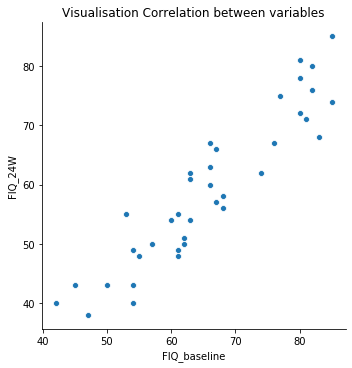

In [15]:
# Let's look if there is a correlation between those variables.
sns.relplot(x="FIQ_baseline", y="FIQ_24W", data=df_filtered, kind="scatter");
plt.title('Visualisation Correlation between variables')

## Interpretation 
We can see there is a positive correlation between FIQ after 24 weeks and the FIQ baseline. This means when FIQ_W24 increases, FIQ_baseline increases as well.

# Visualizing the differences in treatment

Let's add the difference between the baseline scores and twenty-four weeks after treatment to the dataframe.

In [16]:
# Let's compute the difference between FIQ_baseline and FIQ_24W and add it in a column called 'diff'.
df_filtered['diff'] = df_filtered['FIQ_baseline'] - df_filtered['FIQ_24W']
df_filtered

,Id,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W,diff
0,22,45.9,13.3,56.25,control,none,57.0,52.0,50.0,7.0
1,11,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0,0.0
2,36,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0,15.0
3,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0,12.0
4,9,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0,12.0
7,19,28.1,11.7,51.72,control,none,60.0,54.0,54.0,6.0
8,32,38.8,14.5,36.95,tai chi,none,61.0,48.0,49.0,12.0
9,5,31.3,11.4,62.51,control,diabetes,63.0,59.0,61.0,2.0
10,4,36.9,10.2,57.22,control,hypertension,50.0,46.0,43.0,7.0
12,3,32.2,14.1,40.47,control,none,82.0,70.0,76.0,6.0


### Visualization of gap between 'FIQ_baseline' and 'FIQ_24W'

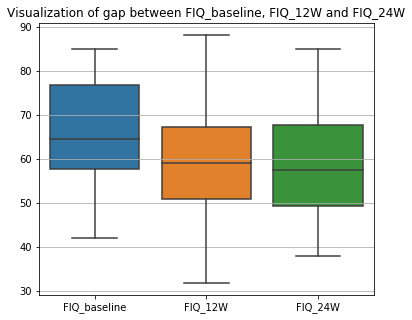

In [17]:
# Let initialize the repere
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
ax1 = ax

# Let draw our box-and-whisker plots
sns.boxplot(data=df_filtered.loc[:,['FIQ_baseline', 'FIQ_12W', 'FIQ_24W']], orient = 'v', ax=ax1)

# Let's set title  to our plot
ax1.set_title("Visualization of gap between FIQ_baseline, FIQ_12W and FIQ_24W")
ax1.yaxis.grid(True)

## Interpretation 

In regards of the visualisation on the difference between FIQ_baseline, FIQ_12W, and FIQ_24W, we have noticed a slightly decrease in pain severity after the 12 (Twelve) weeks of treatment from baseline, and another slightly decrease in pain severity 12 (Twelve) weeks of treatment later. This cumulated, we observer a considerable decrease in pain severity after the 24 (Twenty-four) weeks of treatment. 

But the question is: "Is this variation in pain severity after treatment realy significant?" 

### Formulate the hypothesis after 24 weeks of treatment

Let's assume that $\mu_0$ is the mean score of FIQ pain severity at baseline, $\mu_1$ is the mean score of pain severity of FIQ after 12 (twelve) weeks of treatment, and that $\mu_2$ is the mean score of pain severity of FIQ after 24 weeks of treatment. The null hypothesis and the alternative hypothesis are stated as follow:

- $H_0$: $\mu_0 = \mu_1 = \mu_2$: that means there is no difference in the means scores of pain severity at baseline, after 12 (twelve) weeks, and after 24 weeks of treatment. 

- $H_1$: At least one of the mean scores of pain severity is different to the others.  It is a two-tailed alternative hypothesis.

We use a 5% significance level to test the null hypothesis.


In [18]:
mu_0 = df_filtered['FIQ_baseline'].mean()
mu_1 = df_filtered['FIQ_12W'].mean()
mu_2 = df_filtered['FIQ_24W'].mean()
print(mu_0, mu_1, mu_2)

65.78947368421052 58.94736842105263 59.18421052631579


In [19]:
# Let's check the difference
print(mu_0-mu_1, mu_1-mu_2, mu_0 - mu_2)

6.84210526315789 -0.23684210526315752 6.605263157894733


On average, there is a decrease of 6.84 in the mean score of pain severity after twelve weeks of treatment from baseline and then after an additional twelve weeks of treatment, the mean score increases of 0.24. But the question is: "Is this variation difference of the mean realy significant? This is what will try to answer below here.

#### T-test after 12(twelve) weeks

In [20]:
r, p = stats.ttest_rel(df_filtered['FIQ_baseline'], df_filtered['FIQ_12W'])
print(r, p)

8.4170954630706 4.0295003148601624e-10


In [21]:
p/2

2.0147501574300812e-10

## Interpretation 
We obtain a $p \approx 2.01*\exp(-10)$, which is less than the significance level $\alpha = 0.025.$ A low p-value indicates rejection of the null hypothesis. And since the mean before the treatment is greater than the mean after the treatment, we conclude that the pain severity has decreased from the average pain score after twenty-four (24) weeks of treatment. 

#### T-test after 12(twelve) additional weeks from the week twelve.

In [22]:
r, p = stats.ttest_rel(df_filtered['FIQ_12W'], df_filtered['FIQ_24W'])
print(r, p)

-0.3804571532988399 0.7057816290173937


In [23]:
p/2

0.35289081450869686

## Interpretation 
We obtain a $p \approx 0.35$, which is greater than the significance level $\alpha = 0.025.$ A high p-value indicates support of the null hypothesis. We then conclude that there is no difference in the mean scores of pain severity after twelve weeks from the week twelve of treatment. 

#### T-test after 12(twelve) additional weeks from baseline.

In [24]:
r, p = stats.ttest_rel(df_filtered['FIQ_baseline'], df_filtered['FIQ_24W'])
print(r, p)

8.570753755363839 2.5741513674884057e-10


In [25]:
p/2

1.2870756837442029e-10

## Result
We obtain a $p \approx 1.29*\exp(-10)$, which is less than the significance level $\alpha = 0.025.$ A low p-value indicates rejection of the null hypothesis. And since the mean score of FIQ at the baseline is greater than the mean score of FIQ after twenty-four (24) weeks of treatment, we conclude that the pain severity has decreased from the average pain score after twenty-four (24) weeks of treatment. The variation is really significant.

#### Question 1.2
Visualize the data for baseline treatment and treatment after 24 weeks.


We can split our observations into two groups according to the treatment, namely a control group and a tai chi group.

In [26]:
treatment = df_filtered.groupby(['treatment'])
treatment

We cast the pandas.core.groupby.DataFrameGroupBy object to a list and extract the treatment groups from it and place them in new dataframes.

In [27]:
# Let's put it into new dataframes
control = list(treatment)[0][1]
taichi  = list(treatment)[1][1]
print(taichi.shape, control.shape)

(13, 10) (25, 10)


In [28]:
print(type(taichi), type(control))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


## Visualizing the different means

Let's add the difference between the baseline scores and twenty-four weeks after treatment to the dataframe.

In [29]:
taichi['diff'] = taichi['FIQ_baseline'] - taichi['FIQ_24W']
control['diff'] = control['FIQ_baseline'] - control['FIQ_24W']

#### Now, let visualize the data of pain severity at baseline treatment and after 24 weeks of  treatment.

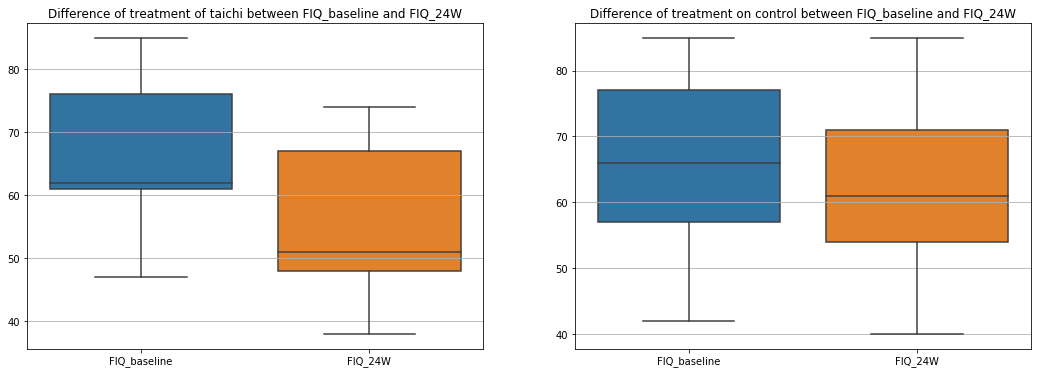

In [30]:
# Let initialize the repere
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
(ax2, ax3) = ax

# Let draw our box-and-whisker plots
sns.boxplot(data=control.loc[:,['FIQ_baseline','FIQ_24W']], orient = 'v', ax=ax3)
sns.boxplot(data=taichi.loc[:,['FIQ_baseline','FIQ_24W']], orient = 'v', ax=ax2)

# Let's set title  to our plot
ax2.set_title("Difference of treatment of taichi between FIQ_baseline and FIQ_24W")
ax3.set_title("Difference of treatment on control between FIQ_baseline and FIQ_24W")
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)

## Interpretation 

In regards of the visualisation on the difference between FIQ_baseline and FIQ_24W scores, we have noticed a considerable decrease in pain severity after the 24 (Twenty-four) weeks of treatment with taichi.

As for the difference between FIQ_baseline and FIQ_24W scores in the case of treatment link to control, there is a lightly decrease in pain severity after the 24 (Twenty-four) weeks.

In [31]:
taichi.describe()

,Id,BMI,duration,age,FIQ_baseline,FIQ_12W,FIQ_24W,diff
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,31.923077,32.630769,12.361538,48.811538,66.153846,55.923077,55.000000,11.153846
std,10.665064,7.837558,4.578671,8.169556,11.838117,12.392616,12.110601,2.034951
min,14.000000,20.300000,3.300000,36.950000,47.000000,32.000000,38.000000,8.000000
25%,25.000000,29.400000,9.700000,43.690000,61.000000,48.000000,48.000000,10.000000
50%,33.000000,33.300000,14.200000,48.310000,62.000000,53.000000,51.000000,11.000000
75%,37.000000,37.300000,15.400000,56.160000,76.000000,65.000000,67.000000,12.000000
max,50.000000,45.800000,18.000000,62.730000,85.000000,75.000000,74.000000,15.000000


In [32]:
control.describe()

,Id,BMI,duration,age,FIQ_baseline,FIQ_12W,FIQ_24W,diff
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000
mean,22.120000,34.468000,13.676000,50.916000,65.600000,60.520000,61.360000,4.24000
std,15.959114,5.553882,2.967221,6.887995,12.165525,12.619826,12.796093,3.96106
min,1.000000,25.000000,8.900000,36.560000,42.000000,35.000000,40.000000,-2.00000
25%,9.000000,30.900000,11.400000,47.210000,57.000000,52.000000,54.000000,2.00000
50%,19.000000,34.000000,13.300000,51.720000,66.000000,59.000000,61.000000,3.00000
75%,39.000000,38.900000,16.700000,55.880000,77.000000,70.000000,71.000000,7.00000
max,49.000000,45.900000,19.800000,62.510000,85.000000,88.000000,85.000000,12.00000


#### Question 1.3
Formulate an hypothesis about pain severity before and after treatment in 24 weeks.

We want to measure how effective treatment is so the severity of illness is measured before treatment and then after treatment. Since, we would like to see if there is a difference in the means of pain severity before and after 24 weeks of treatment. We could use a paired sample T-test for that. 

Let's assume that $\mu_d$ is the mean difference of pain severity before treatment and after 24 weeks of treatment. Assuming that $\mu_0$ is the mean of FIQ pain severity at baseline and that $\mu_1$ is the pain severity of FIQ after 24 weeks of treatment, the null hypothesis and the alternative hypothesis are stated as follow:

- $H_0$: $\mu_d = \mu_1 - \mu_0 = 0$: that means there is no difference in pain severity before treatment and after 24 weeks of treatment. 

- $H_1$: $\mu_d = \mu_1 - \mu_0  \leq 0$, This means the pain severity at baseline is greater than the pain severity after 24 weeks of treatment.  It is a one-tailed alternative hypothesis.

We use a 5% significance level to test the null hypothesis.


#### Question 1.4 
Discuss your results.

#### Let us starts with the test resulting from the treatment based on taichi.  

In [33]:
mu_0 = taichi['FIQ_baseline'].mean()
mu_1 = taichi['FIQ_24W'].mean()
print(mu_0, mu_1)

66.15384615384616 55.0


In [34]:
print(taichi['FIQ_baseline'].std(),taichi['FIQ_24W'].std())

11.838117487211623 12.110601416389967


In [35]:
# Let's check the difference
print(mu_0-mu_1)

11.15384615384616


On average, there is a difference in the pain severity before and after treatment of 11.15. Is this difference significant? This what will try to answer below here.

In [36]:
stats.ttest_rel(taichi['FIQ_baseline'], taichi['FIQ_24W'])

Ttest_relResult(statistic=19.762521993455078, pvalue=1.6034527615814906e-10)

## Interpretation 
We obtain a $p \approx 1.6*\exp(-10)$, which is less than the significance level $\alpha = 0.05.$ A low p-value indicates rejection of the null hypothesis. And since the mean score of pain severity at baseline is greater than the mean score of pain severity after twenty-four (24) weeks treatment, we conclude that the pain severity has signicantly decreased from the average score of pain severity after twenty-four (24) weeks of treatment with tai chi. 

#### For the result of the alternative treatment: I mean the test resulting from the treatment based on control, we have: 

In [37]:
mu_0 = control['FIQ_baseline'].mean()
mu_1 = control['FIQ_24W'].mean()
print(mu_0, mu_1)

65.6 61.36


In [38]:
# Let's check the difference
print(mu_0-mu_1)

4.239999999999995


On average, there is a difference in the pain severity before and after treatment of 4.38. Is this difference significant? This what will try to answer below here.

In [39]:
stats.ttest_rel(control['FIQ_baseline'], control['FIQ_24W'])

Ttest_relResult(statistic=5.3521020929403855, pvalue=1.7085704428738522e-05)

## Interpretation 
We obtain a $p \approx 6.84*\exp(-6)$, which is less than the significance level $\alpha = 0.05.$ A low p-value indicates rejection of the null hypothesis. And since the mean before the treatment is greater than the mean after the treatment, we conclude that the mean score of pain severity has decreased from the average score of pain after twenty-four (24) weeks of treatment base on control. 

## Result interpretation
Of the 50 randomly assigned patients, after pre-processing analysis we have just remained with 38 patients. 13  of the 39 patients were submitted under treatment of control and 25 under the tai chi. The tai chi group had clinically important improvements in the FIQ total score and quality of life. Mean (±SD)
baseline and 24-week FIQ scores for the tai chi group were 66.15±11.84 and 55.0±12.11,
respectively, versus 65.6±12.17 and 61.36±12.8, respectively, for the control group (change
from baseline in the tai chi group, −11.15 points; $P < 0.05$  vs. change from baseline in the control group,
−4.24 points; $P<0.05$). 

## Conclusions
Tai chi may be a useful treatment for fibromyalgia and merits long-term study in
larger study populations. 

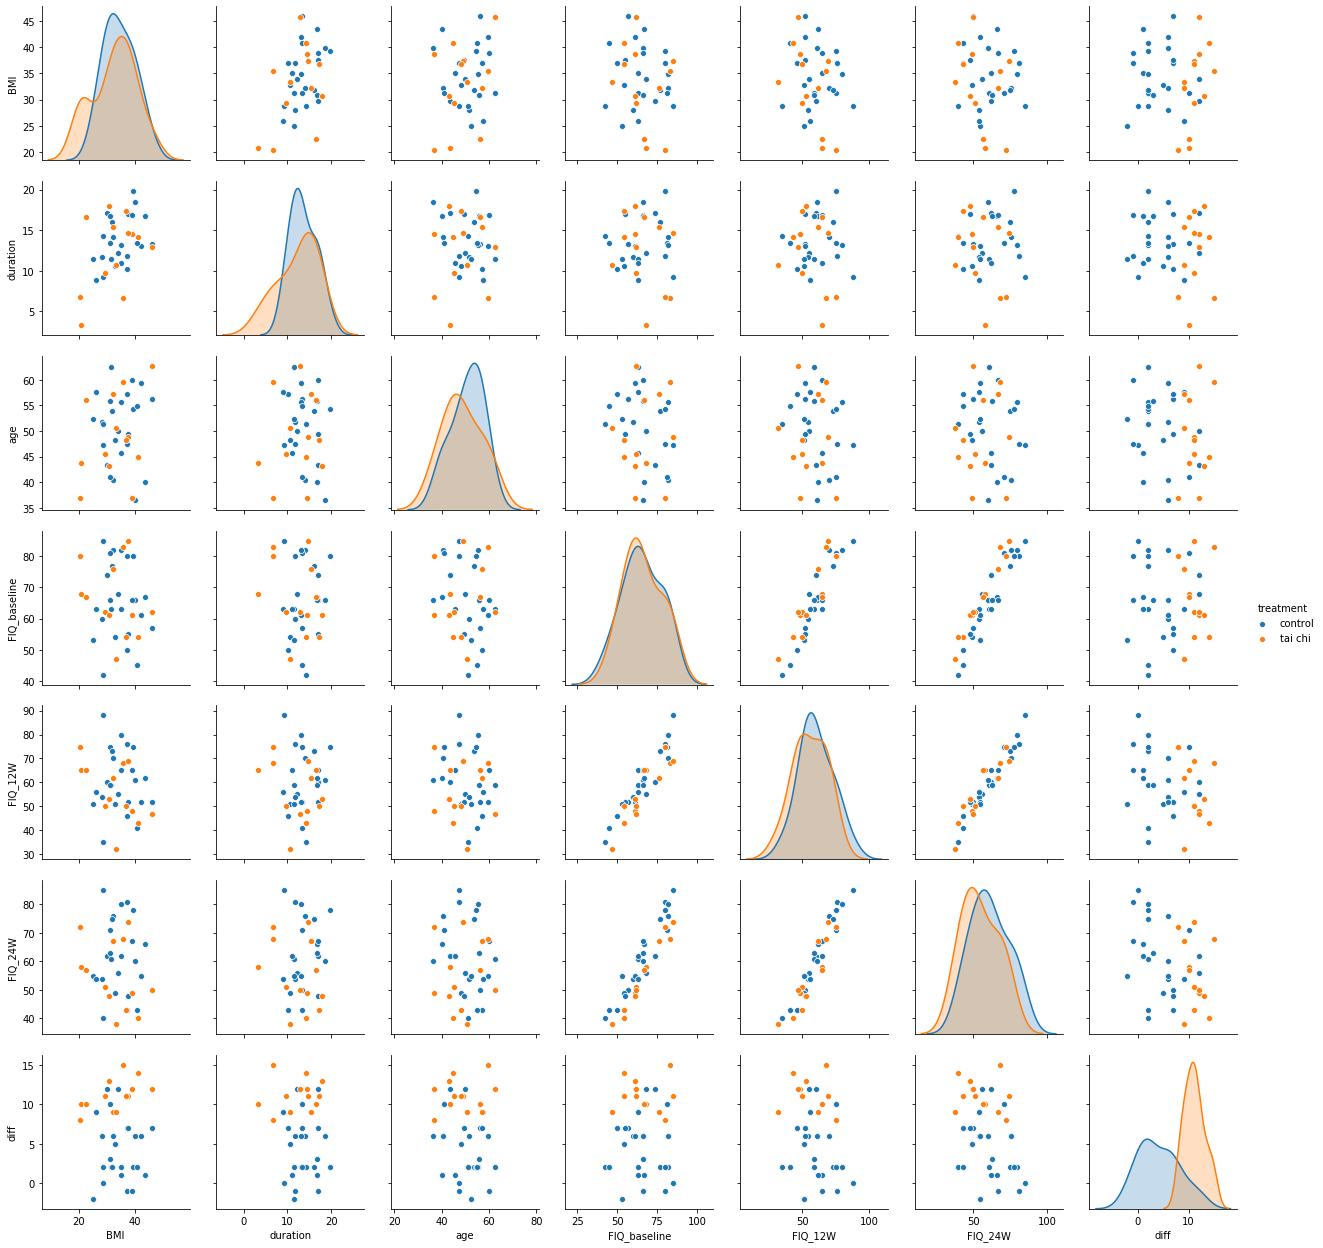

In [40]:
# Let's of have look of the correlation between variables.
# Let's remove the id in the dataframe df_filtered
df_filtered.drop(axis =1, columns = ['Id'], inplace =True)

# Let's have a look of the pairplot
sns.pairplot(df_filtered, hue='treatment', height=2.5);

### Interpretation
This pairplot shows a strong positive correlation between the pair variables (FIQ_baseline, FIQ_12W), (FIQ_baseline, FIQ_24W), and (FIQ_12W, FIQ_24W) for both tai chi and control treatment.

### Question 2

The following is measurement data on the bonding strength of three types of resin. Are there any differences between the resin material? 
<img src='assessImg.PNG'>

Source: [Analysis of variance (ANOVA) comparing means of more than two groups](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3916511/)

In [41]:
# Let's load data into a dataframe
raw_data = {'A': [19.7, 20.1, 21.3, 23.5, 9.3, 27.1, 11.6, 12.2, 15.9, 17.0, 17.2,18.4, 19.8, 23.4,28.0],
            'B': [23.0, 24.5, 24.6, 27.1, 12.0, 27.8, 12.8, 16.2, 19.8, 22.4, 23.6, 25.3, 27.9, 34.6, 35.2],
            'C': [21.6, 25.5, 25.9, 30.7, 33.0, 16.5, 22.7, 24.2, 26.2, 28.4, 28.5, 30.7, 32.2, 33.8, 34.5]}
df = pd.DataFrame(raw_data, columns = ['A', 'B', 'C'])
df

,A,B,C
0,19.7,23.0,21.6
1,20.1,24.5,25.5
2,21.3,24.6,25.9
3,23.5,27.1,30.7
4,9.3,12.0,33.0
5,27.1,27.8,16.5
6,11.6,12.8,22.7
7,12.2,16.2,24.2
8,15.9,19.8,26.2
9,17.0,22.4,28.4


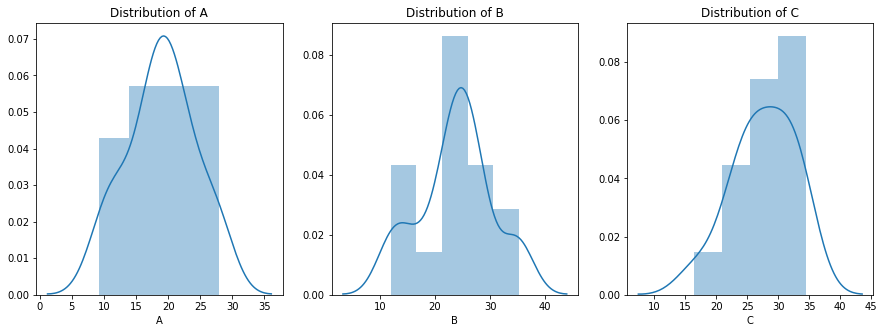

In [42]:
fig, ax = plt.subplots(ncols =3, figsize=(15,5))
(ax1, ax2, ax3) = ax

# Let draw our box-and-whisker plots
sns.distplot(df['A'], ax=ax1).set_title('Distribution of A');
sns.distplot(df['B'], ax=ax2).set_title('Distribution of B');
sns.distplot(df['C'], ax=ax3).set_title('Distribution of C');

### Interpretation of Distribution of A
we see that the data points centred in the range $17 \leq x < 22$. From the range $15\leq x < 28$ data points are constants, and we observe a few data points that stretch from $9.3 \leq x < 15$. 
### Interpretation of Distribution of B
We see that the data points centred in the range  22≤𝑥<27. We see a peak in the data. To the left of the peak, we observe a few data points that stretch from 27 to 35. This shape does not occur to the left of the peak. The data is skewed to the right, indicated by the tail stretching off to the right.
### Interpretation of Distribution of C
We see that the data points centred in the range $25 \leq x < 30$. We see a peak in the data. To the left of the peak, we observe a few data points that stretch from 16.5 to 30. This shape does not occur to the right of the peak. The data is skewed to the left, indicated by the tail stretching off to the left.

In [43]:
# Let's have a look at the different statistics:
df.describe()

,A,B,C
count,15.000000,15.000000,15.000000
mean,18.966667,23.786667,27.626667
std,5.386049,6.709893,5.078451
min,9.300000,12.000000,16.500000
25%,16.450000,21.100000,24.850000
50%,19.700000,24.500000,28.400000
75%,22.350000,27.450000,31.450000
max,28.000000,35.200000,34.500000


As you can see, the three different types of resin have differing means. However, considering the standard deviations, there is some overlap. We want to establish whether these means are actually equal or not. And for that let us uses the ANOVA test to push further this study.

### Visualization of the means

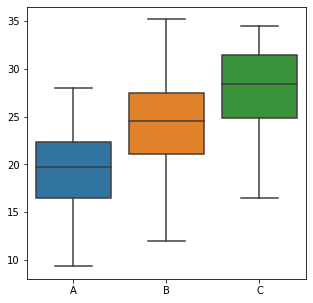

In [44]:
fig, ax = plt.subplots(figsize =(5,5))
sns.boxplot(data=df.loc[:,['A','B','C']], orient = 'v')

In [45]:
print(df['A'].std(), df['B'].std(), df['C'].std())

5.38604899806192 6.709893193387408 5.0784512074712955


The resin of type 'C' returns seem better than the other two returns as the mean of resin of type 'C' is greater. The standard deviation are similar so resins returns within each group are equally spread out.

## Formulation of Hypothesis 

We state the null and alternative hypotheses as follows:

- $𝐻_0$:  the means of different types of resin are equal.

- $𝐻_1$:  At least one mean of a type of resin is different the means of the others type of resin.

We use a significance level of 0.05.

## Test

In [46]:
stats.f_oneway(df['A'], df['B'], df['C'])

F_onewayResult(statistic=8.488055984887513, pvalue=0.0008017448866768368)

## Interpretation of the result
We obtain a $p \approx 0.0008$, which is less than the significance level $\alpha = 0.05.$ A low p-value indicates rejection of the null hypothesis and then a support for the alternative hypothesis. This enable us to conclute that at least one of the type of resin is different from the other types. But we do not know how they behave between them. We do have to push the boundaries of the study to see more of the insight.

Further analysis such as pairwise comparison would also be required for verifying our hypothesis, because stand alone ANOVA cannot locate which specific types were statistically significantly different from each other.

### Formulation of Hypothesis for the pair of resin of type A and of type B
Let's assume that $\mu_0$ is the mean score of resin of type A, and that $\mu_1$ is the mean score of resin of type B, the null hypothesis and the alternative hypothesis are stated as follow:

- $H_0: \mu_1=\mu_0 $: there is no difference the mean score of resin of type A, and the mean score of resin of type B. 

- $H_1$: $\mu_0 \neq \mu_1$, there is difference between the mean score of resin of type A, and the mean score of resin of type B. .

We use a 5% significance level to test the null hypothesis.


### Test

In [47]:
mu_0 =df['A'].mean()
mu_1 =df['B'].mean()
print(mu_0, mu_1)

18.966666666666665 23.78666666666667


The means of the resin of type A and the resin of B are different. But the question is: Is that difference really significant? Let's answer that question below here. 

In [48]:
r, p = stats.ttest_rel(df['A'], df['B'])
print(r, p)

-6.763130266250603 9.123645535628845e-06


In [49]:
p/2

4.561822767814422e-06

We obtain, $P\approx 4.56*exp(-6)$, this is less than the level of significance $\alpha = 0.025$. The low P-value indicates the rejection of the null hypothesis. This means the resin of type B is greater than the resin of type A.  

### Formulation of Hypothesis for the pair of resin of type B and of type C
Let's assume that $\mu_1$ is the mean score of resin of type B, and that $\mu_2$ is the mean score of resin of type C, the null hypothesis and the alternative hypothesis are stated as follow:

- $H_0: \mu_1=\mu_2 $: there is no difference the mean score of resin of type B, and the mean score of resin of type C. 

- $H_1$: $\mu_1 \neq \mu_2$, there is difference between the mean score of resin of type B, and the mean score of resin of type C. 

We use a 5% significance level to test the null hypothesis.

### Test

In [50]:
mu_1 =df['B'].mean()
mu_2 =df['C'].mean()
print(mu_1, mu_2)

23.78666666666667 27.62666666666666


### Interpretation 

The means of the resin of type B and the resin of C are different. But the question is: Is that difference really significant? Let's answer that question below here.

In [51]:
r, p = stats.ttest_rel(df['B'],df['C'])
print(r,p)

-2.1388794799264246 0.05055256974092309


In [52]:
p/2

0.025276284870461546

### Interpretation
We obtain, $P\approx 0.0253$, this is greater than the level of significance $\alpha = 0.025$. The high P-value indicates support of the null hypothesis. This means the resin of type B is equal to the resin of type C.  

## Conclusion
The mean of the resin of type B is greater than the mean of the resin of type A whereas the mean of resin of type B is equal to the mean of the resin of type C. 